# Домашнее задание № 0
Вам необходимо провести анализ данных и с помощью него ответить на поставленные вопросы. 

# Исходные данные
Этот набор данных представляет собой описание около 1 миллиона треков с платформы Spotify. Скачайте датасет и ознакомьтесь с описанием данных в [источнике](https://www.kaggle.com/datasets/amitanshjoshi/spotify-1million-tracks/data).

In [1]:
import pandas as pd

In [2]:
path = 'spotify_data.csv'
df = pd.read_csv(path, index_col=0)

In [3]:
df.sample(3)

artist_name         track_name                track_id  popularity  \
230178    PhaseOne                UFO  0LNhXi03U4uIS5RBxE4tDq          13   
919767          69          Fara Tine  6MwuHs6DEJJTMYDb1Ua10E           0   
421284    Kid Loco  The Morning After  7ovNetXenusbaOmWanOWJC          30   

        year     genre  danceability  energy  key  loudness  mode  \
230178  2016       dub         0.433   0.936    7    -4.895     1   
919767  2003    techno         0.673   0.799    1    -5.546     1   
421284  2019  trip-hop         0.712   0.592   11    -7.961     1   

        speechiness  acousticness  instrumentalness  liveness  valence  \
230178       0.0802       0.00114             0.254    0.0866    0.179   
919767       0.0412       0.03410             0.000    0.0569    0.559   
421284       0.0351       0.22400             0.204    0.0936    0.963   

          tempo  duration_ms  time_signature  
230178  112.812       244256               1  
919767  133.375       169453               4  
421284  111.489       172240               4

# Вопросы

## Анализ данных
С помощью работы с типом данных DataFrame из библиотеки pandas ответье на поставленные вопросы

### 1. Сколько уникальных исполнителей и сколько уникальных жанров содержится в датасете?

**Результат**: Код и текстовый ответ на вопрос в формате

```
Уникальных исполнителей: <ответ>
Уникальных жанров: <ответ>
```

In [4]:
unique_artists = df['artist_name'].nunique()
unique_genres = df['genre'].nunique()

print(f"Уникальных исполнителей: {unique_artists}")
print(f"Уникальных жанров: {unique_genres}")

Уникальных исполнителей: 64158
Уникальных жанров: 82


### 2. Есть ли в данных пропуски? Если да, предложите способ их заполнения и реализуйте его

**Результат**: Код и текстовый ответ на вопрос в формате

```
Для каждого столбца в таблице
<Название столбца> - <Сколько пропусков> - <Описание способа заполнения> (Если были пропуски)
```


In [5]:
print("Проверка пропусков в данных:")
missing_data = df.isnull().sum()

df_clean = df.copy()

for column, missing_count in missing_data.items():
    if missing_count > 0:
        print(f"{column} - {missing_count} пропусков")
        
        if df_clean[column].dtype in ['float64', 'int64']:
            median_value = df_clean[column].median()
            df_clean[column] = df_clean[column].fillna(median_value)
            print(f"  Заполнено медианой: {median_value}")
        else:
            mode_value = df_clean[column].mode()[0] if not df_clean[column].mode().empty else 'Unknown'
            df_clean[column] = df_clean[column].fillna(mode_value)
            print(f"  Заполнено модой: '{mode_value}'")
    else:
        print(f"{column} - 0 пропусков")

print(f"\nПосле обработки пропусков:")
print(f"Всего пропусков в данных: {df_clean.isnull().sum().sum()}")

df = df_clean

Проверка пропусков в данных:
artist_name - 15 пропусков
  Заполнено модой: 'Traditional'
track_name - 1 пропусков
  Заполнено модой: 'Intro'
track_id - 0 пропусков
popularity - 0 пропусков
year - 0 пропусков
genre - 0 пропусков
danceability - 0 пропусков
energy - 0 пропусков
key - 0 пропусков
loudness - 0 пропусков
mode - 0 пропусков
speechiness - 0 пропусков
acousticness - 0 пропусков
instrumentalness - 0 пропусков
liveness - 0 пропусков
valence - 0 пропусков
tempo - 0 пропусков
duration_ms - 0 пропусков
time_signature - 0 пропусков

После обработки пропусков:
Всего пропусков в данных: 0


### 3. Есть ли признаки, которые не отвечают указанным в описании ограничениям? Если есть, то замените их

**Результат**: Код и текстовый ответ на вопрос в формате

```
Для каждого столбца в таблице
<Название столбца> - <Сколько не соответствующих ограничениям данных> - <Описание способа замены> (Если были некорректные данные)
```

In [6]:
print("\nПроверка ограничений данных:")

limits = {
    'popularity': (0, 100),
    'danceability': (0, 1),
    'energy': (0, 1),
    'key': (0, 11),
    'loudness': (-60, 0),
    'mode': (0, 1),
    'speechiness': (0, 1),
    'acousticness': (0, 1),
    'instrumentalness': (0, 1),
    'liveness': (0, 1),
    'valence': (0, 1),
    'time_signature': (3, 7),
    'year': (2000, 2023)
}

for column, (min_val, max_val) in limits.items():
    if column in df.columns:
        invalid_count = ((df[column] < min_val) | (df[column] > max_val)).sum()
        if invalid_count > 0:
            print(f"{column} - {invalid_count} некорректных значений")
            
            if column in ['danceability', 'energy', 'speechiness', 'acousticness', 
                         'instrumentalness', 'liveness', 'valence']:
                df[column] = df[column].clip(0, 1)
                print(f"  Значения обрезаны до диапазона [0, 1]")
            elif column == 'popularity':
                df[column] = df[column].clip(0, 100)
                print(f"  Значения обрезаны до диапазона [0, 100]")
            else:
                valid_values = df[column][(df[column] >= min_val) & (df[column] <= max_val)]
                if not valid_values.empty:
                    median_val = valid_values.median()
                    df.loc[(df[column] < min_val) | (df[column] > max_val), column] = median_val
                    print(f"  Некорректные значения заменены на медиану: {median_val}")
        else:
            print(f"{column} - 0 некорректных значений")


Проверка ограничений данных:
popularity - 0 некорректных значений
danceability - 0 некорректных значений
energy - 0 некорректных значений
key - 0 некорректных значений


loudness - 1198 некорректных значений
  Некорректные значения заменены на медиану: -7.455
mode - 0 некорректных значений
speechiness - 0 некорректных значений
acousticness - 0 некорректных значений
instrumentalness - 0 некорректных значений
liveness - 0 некорректных значений
valence - 0 некорректных значений
time_signature - 13888 некорректных значений
  Некорректные значения заменены на медиану: 4.0
year - 0 некорректных значений


## Визуальный анализ
Ответом на вопрос должен быть график или несколько графиков в одной фигуре (картинке), с минимальной подписью

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm

### 1. Как Energy зависит от Danceability? Как зависит Loudness от Energy? Как эти параметры влияют на Valence?

**Результат**: Код, реализующий графики:

- Зависимость Energy от Danceability
- Зависимость Loudness от Energy
- Зависимость Valence от Energy, зависимость Valence от Danceability; в одной оси фигуры
- Зависимость Valence от Loudness
- Матрица корреляции Energy, Danceability, Loudness, Valence

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

**Дополнительно**: Нарисовать стрелки и подписи к ним на графике, обращающие внимание на ключевые моменты, позволяющие сделать выводы о зависимостях. 

C:\Users\ilyar\AppData\Local\Temp\ipykernel_4280\712027020.py:46: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\ilyar\anaconda3\envs\my-rdkit-env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


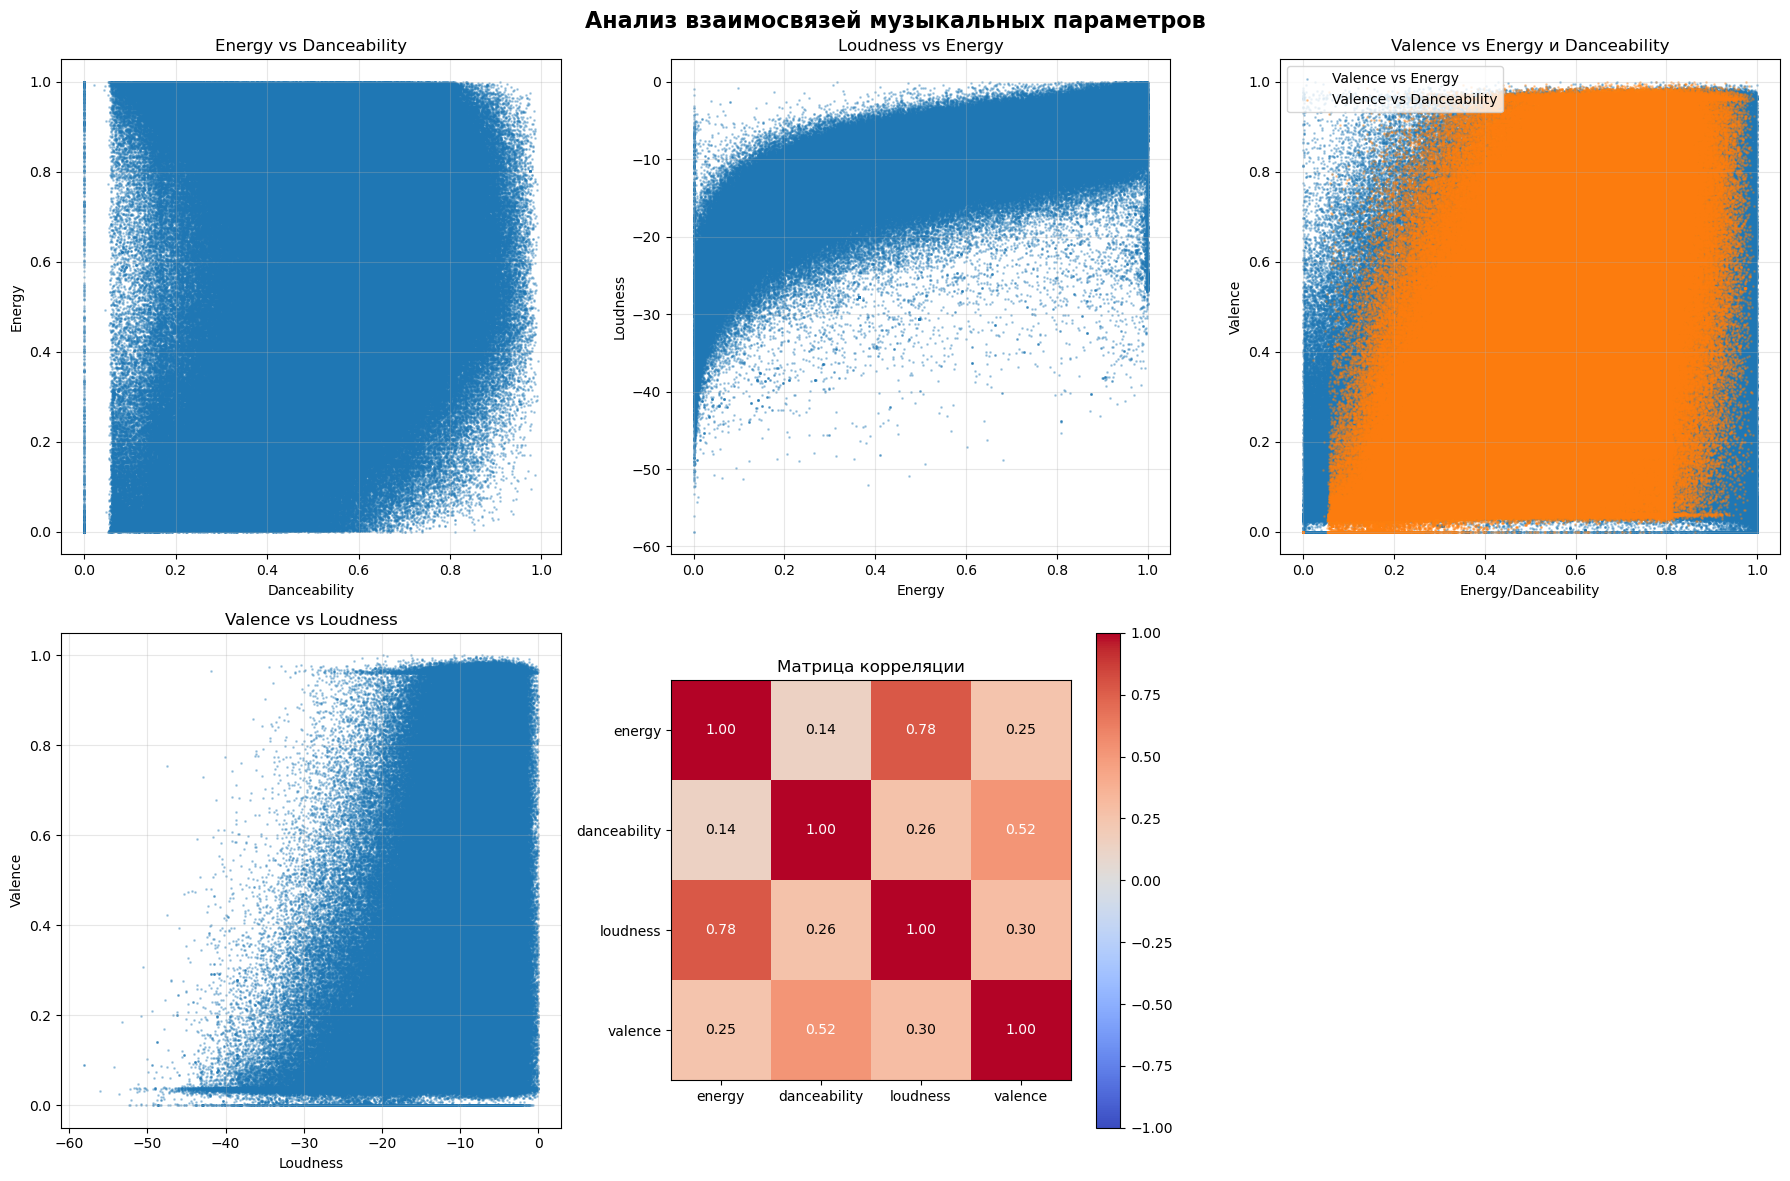

In [8]:
fig, axis = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Анализ взаимосвязей музыкальных параметров', fontsize=16, fontweight='bold')

axis[0,0].scatter(df['danceability'], df['energy'], alpha=0.3, s=1)
axis[0,0].set_xlabel('Danceability')
axis[0,0].set_ylabel('Energy')
axis[0,0].set_title('Energy vs Danceability')
axis[0,0].grid(True, alpha=0.3)

axis[0,1].scatter(df['energy'], df['loudness'], alpha=0.3, s=1)
axis[0,1].set_xlabel('Energy')
axis[0,1].set_ylabel('Loudness')
axis[0,1].set_title('Loudness vs Energy')
axis[0,1].grid(True, alpha=0.3)

scatter1 = axis[0,2].scatter(df['energy'], df['valence'], alpha=0.3, s=1, label='Valence vs Energy')
scatter2 = axis[0,2].scatter(df['danceability'], df['valence'], alpha=0.3, s=1, label='Valence vs Danceability')
axis[0,2].set_xlabel('Energy/Danceability')
axis[0,2].set_ylabel('Valence')
axis[0,2].set_title('Valence vs Energy и Danceability')
axis[0,2].legend()
axis[0,2].grid(True, alpha=0.3)

axis[1,0].scatter(df['loudness'], df['valence'], alpha=0.3, s=1)
axis[1,0].set_xlabel('Loudness')
axis[1,0].set_ylabel('Valence')
axis[1,0].set_title('Valence vs Loudness')
axis[1,0].grid(True, alpha=0.3)

corr_matrix = df[['energy', 'danceability', 'loudness', 'valence']].corr()
im = axis[1,1].imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
axis[1,1].set_xticks(range(len(corr_matrix.columns)))
axis[1,1].set_yticks(range(len(corr_matrix.columns)))
axis[1,1].set_xticklabels(corr_matrix.columns)
axis[1,1].set_yticklabels(corr_matrix.columns)
axis[1,1].set_title('Матрица корреляции')

for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        axis[1,1].text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', 
                      ha='center', va='center', color='white' if abs(corr_matrix.iloc[i, j]) > 0.5 else 'black')

plt.colorbar(im, ax=axis[1,1])
axis[1,2].axis('off')

plt.tight_layout()
plt.show()

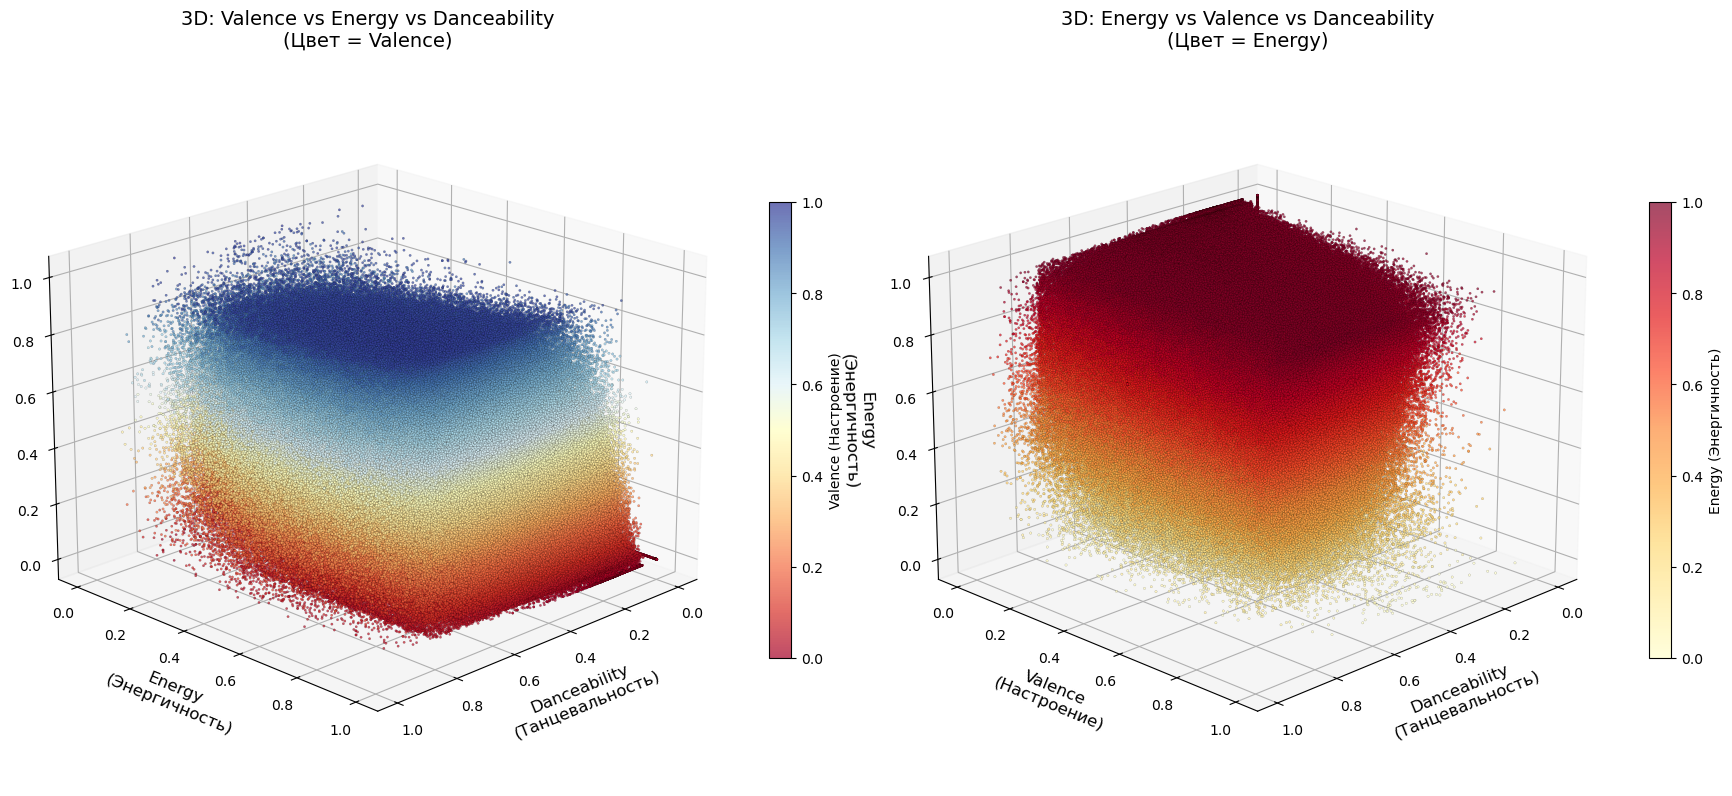

In [9]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(121, projection='3d')

scatter1 = ax1.scatter(df['danceability'], 
                      df['energy'], 
                      df['valence'],
                      c=df['valence'], 
                      cmap='RdYlBu',
                      alpha=0.7,
                      s=3,
                      edgecolors='black', 
                      linewidth=0.1)

ax1.set_xlabel('Danceability\n(Танцевальность)', fontsize=12, labelpad=10)
ax1.set_ylabel('Energy\n(Энергичность)', fontsize=12, labelpad=10)
ax1.set_zlabel('Valence\n(Настроение)', fontsize=12, labelpad=10)
ax1.set_title('3D: Valence vs Energy vs Danceability\n(Цвет = Valence)', fontsize=14, pad=20)

cbar1 = plt.colorbar(scatter1, ax=ax1, shrink=0.6, aspect=20)
cbar1.set_label('Valence (Настроение)', fontsize=10)

ax2 = fig.add_subplot(122, projection='3d')

scatter2 = ax2.scatter(df['danceability'], 
                      df['valence'], 
                      df['energy'],
                      c=df['energy'], 
                      cmap='YlOrRd',
                      alpha=0.7,
                      s=3,
                      edgecolors='black', 
                      linewidth=0.1)

ax2.set_xlabel('Danceability\n(Танцевальность)', fontsize=12, labelpad=10)
ax2.set_ylabel('Valence\n(Настроение)', fontsize=12, labelpad=10)
ax2.set_zlabel('Energy\n(Энергичность)', fontsize=12, labelpad=10)
ax2.set_title('3D: Energy vs Valence vs Danceability\n(Цвет = Energy)', fontsize=14, pad=20)

cbar2 = plt.colorbar(scatter2, ax=ax2, shrink=0.6, aspect=20)
cbar2.set_label('Energy (Энергичность)', fontsize=10)

ax1.view_init(elev=20, azim=45)
ax2.view_init(elev=20, azim=45)

plt.tight_layout()
plt.show()

#### Сделайте общий вывод о том, зависит ли настроение трека (Valence) от проанализированных параметров:
**Результат**: Текстовый ответ на вопрос.

Настроение трека (Valence) демонстрирует слабую положительную корреляцию с Energy и Loudness (≈0.3) и Danceability (≈0.5), что указывает на тенденцию: более энергичные и танцевальные треки чаще имеют позитивное настроение. Однако корреляции недостаточно сильны для однозначных выводов - многие факторы влияют на настроение музыки.

### 2. С годами музыка становится дольше или быстрее?

**Результат**: Код, реализующий графики:

- Зависимость средней продолжительности трека от года, с линией тренда
- Изменение средней продолжительности топ-5 самых длинных треков года
- Изменение средней продолжительности топ-5 самых коротких треков года

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

C:\Users\ilyar\AppData\Local\Temp\ipykernel_4280\131325005.py:35: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('year').apply(
C:\Users\ilyar\AppData\Local\Temp\ipykernel_4280\131325005.py:39: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result = df.groupby('year').apply(


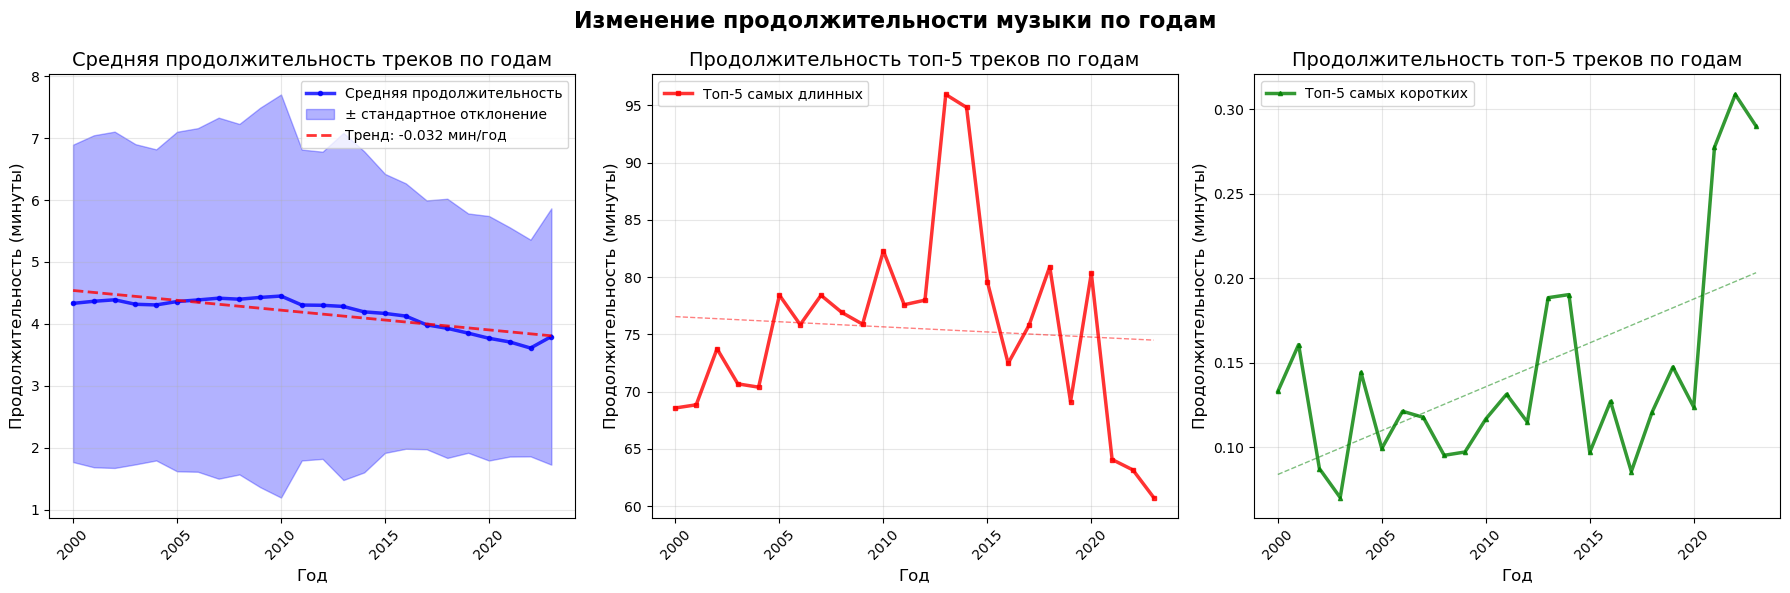

СТАТИСТИЧЕСКИЙ АНАЛИЗ:
ИЗМЕНЕНИЕ ПРОДОЛЖИТЕЛЬНОСТИ (2000-2023):
Средняя продолжительность в 2000: 4.33 мин
Средняя продолжительность в 2023: 3.80 мин
Изменение: -0.54 мин (-12.4%)
Тренд: -0.032 мин/год

ВЫВОДЫ:
Музыка становится КОРОЧЕ с годами


In [10]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Изменение продолжительности музыки по годам', fontsize=16, fontweight='bold')

duration_by_year = df.groupby('year')['duration_ms'].agg(['mean', 'std', 'count']).reset_index()

duration_by_year['mean_minutes'] = duration_by_year['mean'] / 1000 / 60
duration_by_year['std_minutes'] = duration_by_year['std'] / 1000 / 60

axes[0].plot(duration_by_year['year'], duration_by_year['mean_minutes'], 
            linewidth=2.5, marker='o', markersize=3, label='Средняя продолжительность', 
            color='blue', alpha=0.8)

axes[0].fill_between(duration_by_year['year'], 
                    duration_by_year['mean_minutes'] - duration_by_year['std_minutes'],
                    duration_by_year['mean_minutes'] + duration_by_year['std_minutes'],
                    alpha=0.3, color='blue', label='± стандартное отклонение')

# Линия тренда
z_duration = np.polyfit(duration_by_year['year'], duration_by_year['mean_minutes'], 1)
p_duration = np.poly1d(z_duration)
axes[0].plot(duration_by_year['year'], p_duration(duration_by_year['year']), 
             "r--", linewidth=2, alpha=0.8, 
             label=f'Тренд: {z_duration[0]:.3f} мин/год')

axes[0].set_xlabel('Год', fontsize=12)
axes[0].set_ylabel('Продолжительность (минуты)', fontsize=12)
axes[0].set_title('Средняя продолжительность треков по годам', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

def get_top_n_duration(df, n=5, longest=True):
    """Функция для получения средней продолжительности топ-N треков по году"""
    if longest:
        result = df.groupby('year').apply(
            lambda x: x.nlargest(n, 'duration_ms')['duration_ms'].mean() / 1000 / 60
        )
    else:
        result = df.groupby('year').apply(
            lambda x: x.nsmallest(n, 'duration_ms')['duration_ms'].mean() / 1000 / 60
        )
    return result

top5_longest = get_top_n_duration(df, 5, longest=True)
top5_shortest = get_top_n_duration(df, 5, longest=False)

axes[1].plot(top5_longest.index, top5_longest.values, 
            linewidth=2.5, marker='s', markersize=3, 
            label='Топ-5 самых длинных', color='red', alpha=0.8)

axes[2].plot(top5_shortest.index, top5_shortest.values, 
            linewidth=2.5, marker='^', markersize=3, 
            label='Топ-5 самых коротких', color='green', alpha=0.8)

z_longest = np.polyfit(top5_longest.index, top5_longest.values, 1)
p_longest = np.poly1d(z_longest)
axes[1].plot(top5_longest.index, p_longest(top5_longest.index), "r--", alpha=0.5, linewidth=1)

z_shortest = np.polyfit(top5_shortest.index, top5_shortest.values, 1)
p_shortest = np.poly1d(z_shortest)
axes[2].plot(top5_shortest.index, p_shortest(top5_shortest.index), "g--", alpha=0.5, linewidth=1)

axes[1].set_xlabel('Год', fontsize=12)
axes[1].set_ylabel('Продолжительность (минуты)', fontsize=12)
axes[1].set_title('Продолжительность топ-5 треков по годам', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

axes[2].set_xlabel('Год', fontsize=12)
axes[2].set_ylabel('Продолжительность (минуты)', fontsize=12)
axes[2].set_title('Продолжительность топ-5 треков по годам', fontsize=14)
axes[2].legend()
axes[2].grid(True, alpha=0.3)
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("СТАТИСТИЧЕСКИЙ АНАЛИЗ:")
print("=" * 50)

first_year = duration_by_year['year'].min()
last_year = duration_by_year['year'].max()

duration_change = duration_by_year['mean_minutes'].iloc[-1] - duration_by_year['mean_minutes'].iloc[0]
duration_change_percent = (duration_change / duration_by_year['mean_minutes'].iloc[0]) * 100

print(f"ИЗМЕНЕНИЕ ПРОДОЛЖИТЕЛЬНОСТИ ({first_year}-{last_year}):")
print(f"Средняя продолжительность в {first_year}: {duration_by_year['mean_minutes'].iloc[0]:.2f} мин")
print(f"Средняя продолжительность в {last_year}: {duration_by_year['mean_minutes'].iloc[-1]:.2f} мин")
print(f"Изменение: {duration_change:+.2f} мин ({duration_change_percent:+.1f}%)")
print(f"Тренд: {z_duration[0]:.3f} мин/год")

print(f"\nВЫВОДЫ:")
if z_duration[0] > 0:
    print("Музыка становится ДЛИННЕЕ с годами")
else:
    print("Музыка становится КОРОЧЕ с годами")

### 3. Как менялись популярные жанры от 2000 от 2023? 

**Результат**: Код, реализующий график:
- 3 самых популярных по среднему значению жанра каждого года, с подписью значений

График должен иметь название, подписанные оси и подпись значений

**Дополнительно**: Текстовый ответ, какие жанры оказывались в топ-3 чаще всего.

C:\Users\ilyar\AppData\Local\Temp\ipykernel_4280\1733044945.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_genres_by_year = genre_popularity.groupby('year').apply(


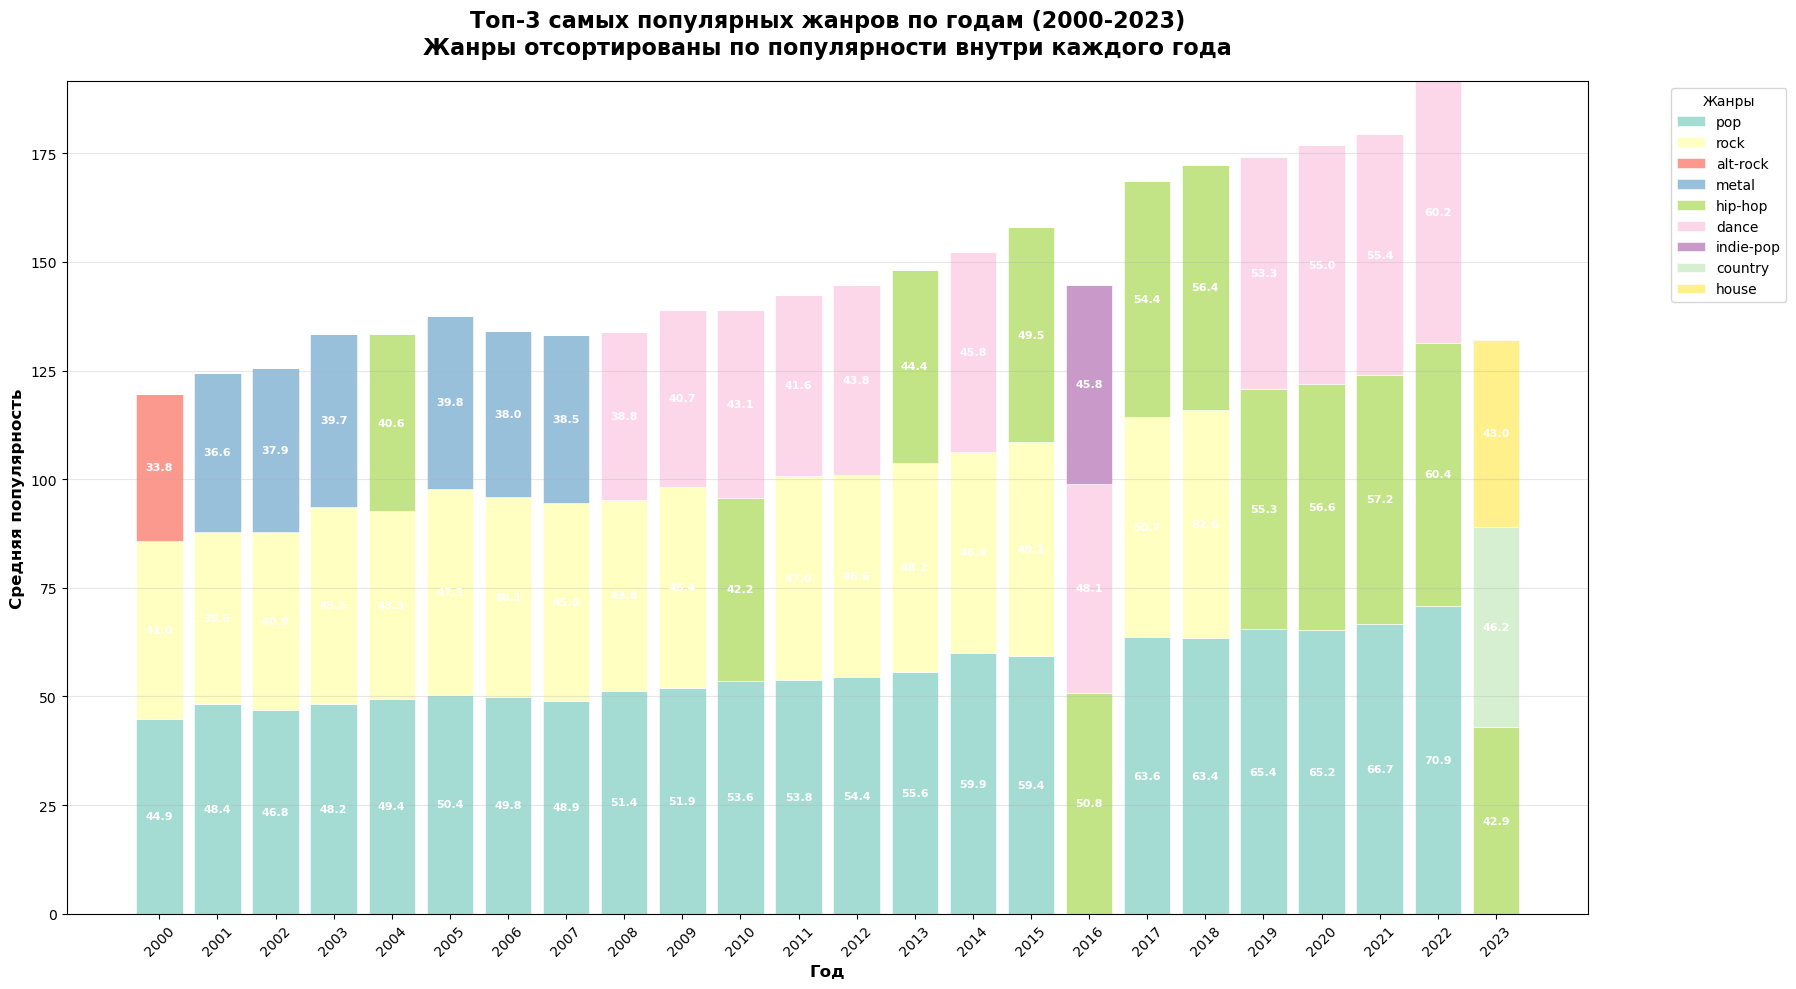

АНАЛИЗ ЧАСТОТЫ ПОЯВЛЕНИЯ ЖАНРОВ В ТОП-3:
Всего уникальных жанров в топ-3: 9
Всего лет в анализе: 24

ТОП-10 САМЫХ ЧАСТЫХ ЖАНРОВ В ТОП-3:
 1. pop                       - 22 раз ( 91.7% лет)
 2. rock                      - 17 раз ( 70.8% лет)
 3. hip-hop                   - 12 раз ( 50.0% лет)
 4. dance                     - 11 раз ( 45.8% лет)
 5. metal                     -  6 раз ( 25.0% лет)
 6. alt-rock                  -  1 раз (  4.2% лет)
 7. indie-pop                 -  1 раз (  4.2% лет)
 8. country                   -  1 раз (  4.2% лет)
 9. house                     -  1 раз (  4.2% лет)

 ЖАНРЫ, КОТОРЫЕ ОКАЗЫВАЛИСЬ В ТОП-3 ЧАЩЕ ВСЕГО:
1. pop - 22 раз (91.7% лет)
2. rock - 17 раз (70.8% лет)
3. hip-hop - 12 раз (50.0% лет)


In [11]:
genre_popularity = df.groupby(['year', 'genre'])['popularity'].agg(['mean', 'count']).reset_index()

genre_popularity = genre_popularity[genre_popularity['count'] >= 10]

top_genres_by_year = genre_popularity.groupby('year').apply(
    lambda x: x.nlargest(3, 'mean')
).reset_index(drop=True)

top_genres_by_year = top_genres_by_year.sort_values(['year', 'mean'], ascending=[True, False])

pivot_df = top_genres_by_year.pivot(index='year', columns='genre', values='mean').fillna(0)

years = sorted(top_genres_by_year['year'].unique())
sorted_data = []

for year in years:
    year_data = top_genres_by_year[top_genres_by_year['year'] == year]
    year_data = year_data.sort_values('mean', ascending=False)
    sorted_data.append(year_data)

all_genres = top_genres_by_year['genre'].unique()

matrix_data = np.zeros((len(years), len(all_genres)))

for i, year in enumerate(years):
    year_genres = sorted_data[i]
    for j, genre in enumerate(all_genres):
        if genre in year_genres['genre'].values:
            matrix_data[i, j] = year_genres[year_genres['genre'] == genre]['mean'].values[0]

plt.figure(figsize=(18, 10))

bottom = np.zeros(len(years))
colors = plt.cm.Set3(np.linspace(0, 1, len(all_genres)))

for j, genre in enumerate(all_genres):
    values = matrix_data[:, j]
    
    if values.sum() > 0:
        bars = plt.bar(years, values, bottom=bottom, label=genre, 
                      color=colors[j], alpha=0.8, edgecolor='white', linewidth=0.5)
        
        for i, (year, value) in enumerate(zip(years, values)):
            if value > 0:
                y_position = bottom[i] + value / 2
                plt.text(year, y_position, f'{value:.1f}', 
                        ha='center', va='center', fontsize=8, fontweight='bold',
                        color='white' if value > 20 else 'black',
                        rotation=90 if value < 8 else 0)
        
        bottom += values

plt.xlabel('Год', fontsize=12, fontweight='bold')
plt.ylabel('Средняя популярность', fontsize=12, fontweight='bold')
plt.title('Топ-3 самых популярных жанров по годам (2000-2023)\nЖанры отсортированы по популярности внутри каждого года', 
          fontsize=16, fontweight='bold', pad=20)

plt.xticks(years, rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Жанры', fontsize=10)
plt.tight_layout()
plt.show()

genre_frequency = top_genres_by_year['genre'].value_counts()

print("АНАЛИЗ ЧАСТОТЫ ПОЯВЛЕНИЯ ЖАНРОВ В ТОП-3:")
print("=" * 50)
print(f"Всего уникальных жанров в топ-3: {len(genre_frequency)}")
print(f"Всего лет в анализе: {len(years)}")

print(f"\nТОП-10 САМЫХ ЧАСТЫХ ЖАНРОВ В ТОП-3:")
for i, (genre, count) in enumerate(genre_frequency.head(10).items(), 1):
    percentage = (count / len(years)) * 100
    print(f"{i:2d}. {genre:25} - {count:2d} раз ({percentage:5.1f}% лет)")

top_3_most_frequent = genre_frequency.head(3)
print(f"\n ЖАНРЫ, КОТОРЫЕ ОКАЗЫВАЛИСЬ В ТОП-3 ЧАЩЕ ВСЕГО:")
for i, (genre, count) in enumerate(top_3_most_frequent.items(), 1):
    percentage = (count / len(years)) * 100
    print(f"{i}. {genre} - {count} раз ({percentage:.1f}% лет)")

### 4. Как связаны между собой Speechiness, Acousticness и Instrumentalness?

**Результат**: Код, реализующий 2 различных по типу графика. Выбранные графики должны наиболее хорошо подходить для описания зависимости между указанными параметрами.

Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

**Дополнительно**: Текстовый ответ, почему были выбраны именно такие графики.

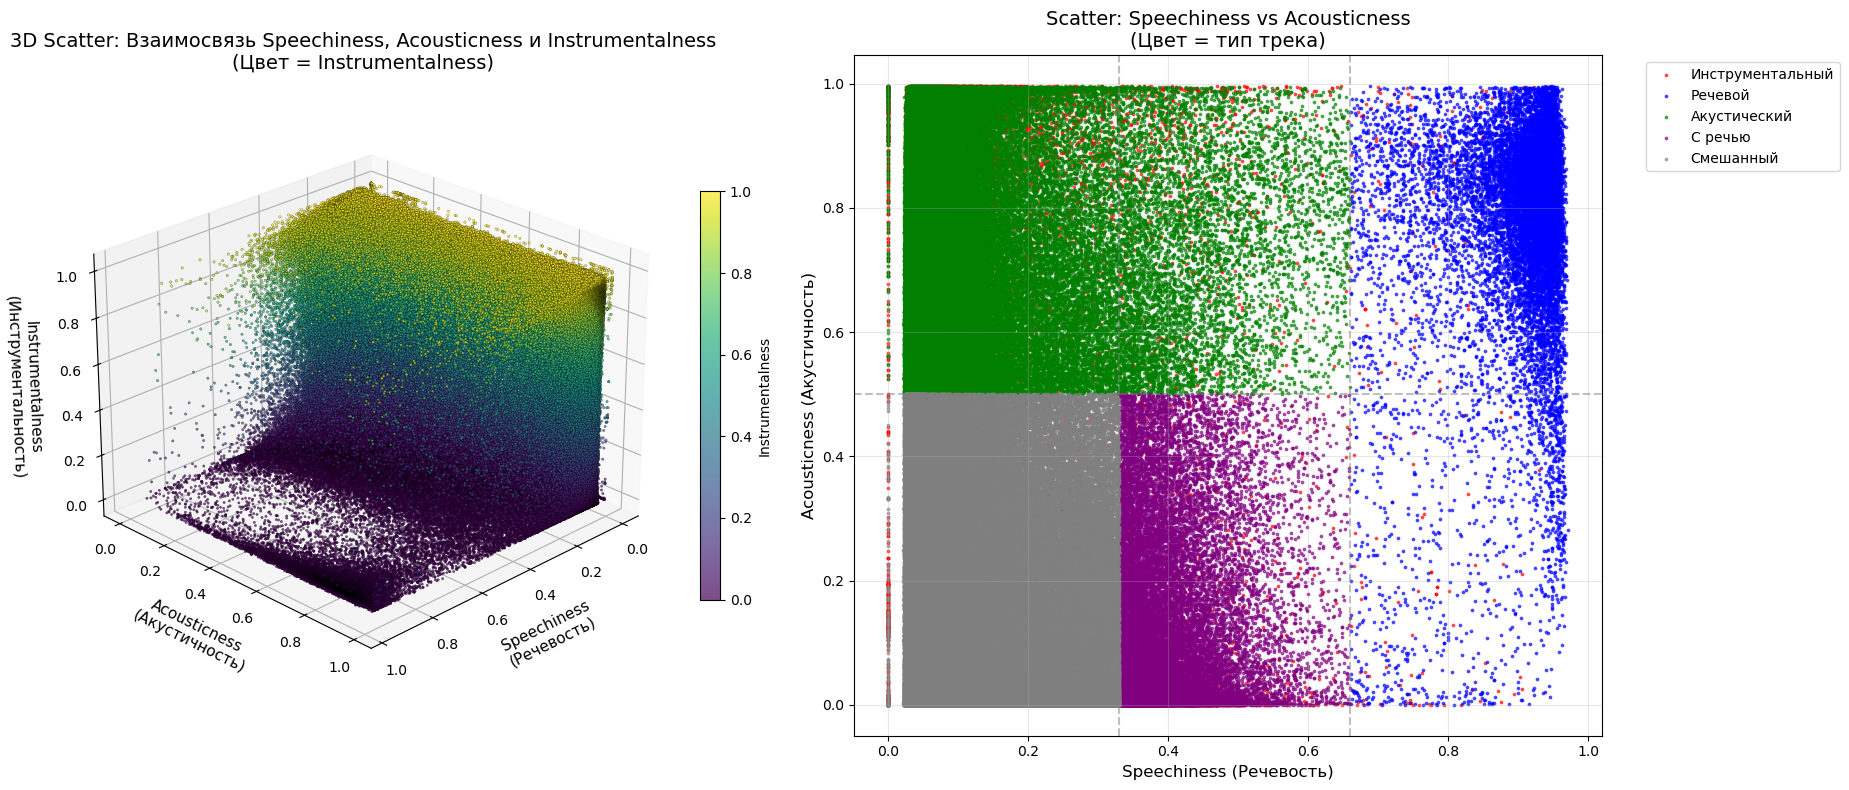

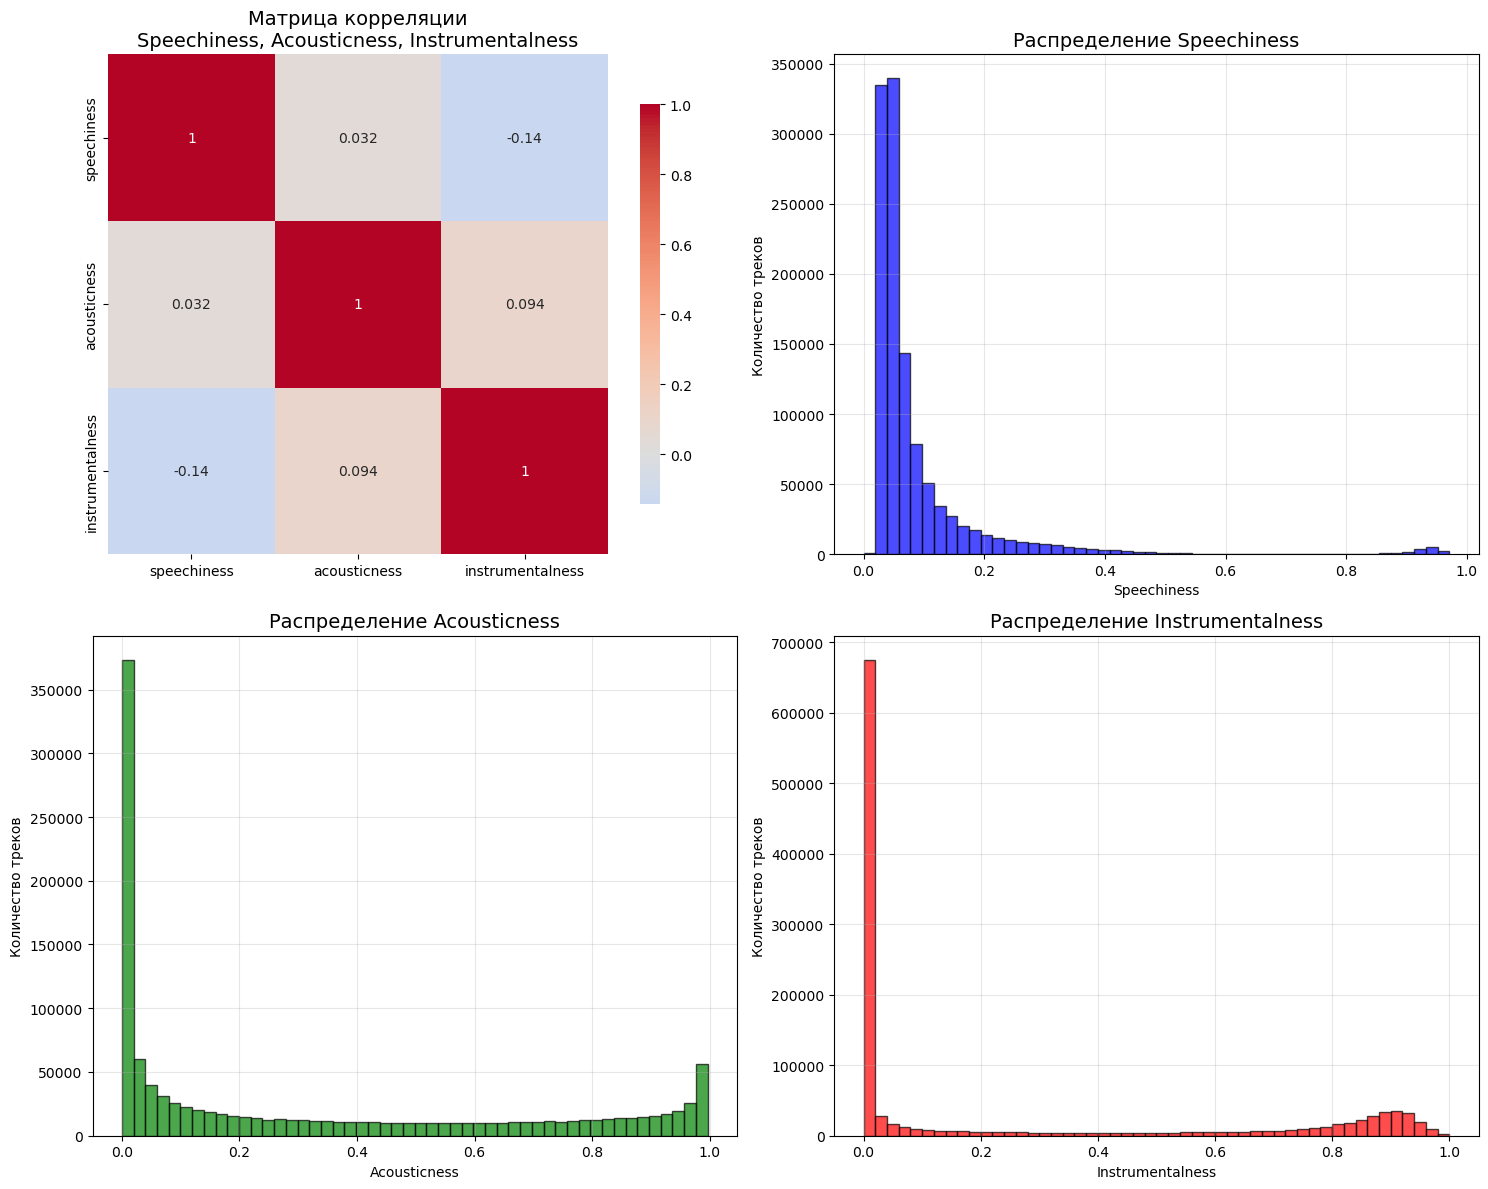

СТАТИСТИЧЕСКИЙ АНАЛИЗ ВЗАИМОСВЯЗЕЙ:

ОСНОВНЫЕ СТАТИСТИКИ:
speechiness    : mean=0.093, std=0.127
acousticness   : mean=0.322, std=0.355
instrumentalness: mean=0.252, std=0.365

РАСПРЕДЕЛЕНИЕ КАТЕГОРИЙ ТРЕКОВ:
Смешанный           : 579369 треков ( 50.0%)
Инструментальный    : 316375 треков ( 27.3%)
Акустический        : 225942 треков ( 19.5%)
С речью             : 21230 треков (  1.8%)
Речевой             : 16848 треков (  1.5%)


In [12]:
fig = plt.figure(figsize=(18, 8))

ax1 = fig.add_subplot(121, projection='3d')

scatter = ax1.scatter(df['speechiness'], 
                     df['acousticness'], 
                     df['instrumentalness'],
                     c=df['instrumentalness'], 
                     cmap='viridis',
                     alpha=0.7,
                     s=3,
                     edgecolor='black', 
                     linewidth=0.2)

ax1.set_xlabel('Speechiness\n(Речевость)', fontsize=11, labelpad=10)
ax1.set_ylabel('Acousticness\n(Акустичность)', fontsize=11, labelpad=10)
ax1.set_zlabel('Instrumentalness\n(Инструментальность)', fontsize=11, labelpad=10)
ax1.set_title('3D Scatter: Взаимосвязь Speechiness, Acousticness и Instrumentalness\n(Цвет = Instrumentalness)', 
              fontsize=14, pad=20)

cbar1 = plt.colorbar(scatter, ax=ax1, shrink=0.6, aspect=20)
cbar1.set_label('Instrumentalness', fontsize=10)

ax1.view_init(elev=25, azim=45)


ax2 = fig.add_subplot(122)

def categorize_track(row):
    """Категоризация треков по преобладающим характеристикам"""
    if row['instrumentalness'] > 0.5:
        return 'Инструментальный'
    elif row['speechiness'] > 0.66:
        return 'Речевой'
    elif row['acousticness'] > 0.5:
        return 'Акустический'
    elif row['speechiness'] > 0.33:
        return 'С речью'
    else:
        return 'Смешанный'

df['category'] = df.apply(categorize_track, axis=1)

category_colors = {
    'Инструментальный': 'red',
    'Речевой': 'blue', 
    'Акустический': 'green',
    'С речью': 'purple',
    'Смешанный': 'gray'
}

for category, color in category_colors.items():
    category_data = df[df['category'] == category]
    ax2.scatter(category_data['speechiness'], 
               category_data['acousticness'], 
               c=color, 
               label=category, 
               alpha=0.6, 
               s=3)

ax2.set_xlabel('Speechiness (Речевость)', fontsize=12)
ax2.set_ylabel('Acousticness (Акустичность)', fontsize=12)
ax2.set_title('Scatter: Speechiness vs Acousticness\n(Цвет = тип трека)', fontsize=14)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.grid(True, alpha=0.3)

ax2.axhline(y=0.5, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=0.33, color='gray', linestyle='--', alpha=0.5)
ax2.axvline(x=0.66, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

corr_matrix = df[['speechiness', 'acousticness', 'instrumentalness']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            ax=axes[0,0], square=True, cbar_kws={'shrink': 0.8})
axes[0,0].set_title('Матрица корреляции\nSpeechiness, Acousticness, Instrumentalness', fontsize=14)

axes[0,1].hist(df['speechiness'], bins=50, alpha=0.7, color='blue', edgecolor='black')
axes[0,1].set_xlabel('Speechiness')
axes[0,1].set_ylabel('Количество треков')
axes[0,1].set_title('Распределение Speechiness', fontsize=14)
axes[0,1].grid(True, alpha=0.3)

axes[1,0].hist(df['acousticness'], bins=50, alpha=0.7, color='green', edgecolor='black')
axes[1,0].set_xlabel('Acousticness')
axes[1,0].set_ylabel('Количество треков')
axes[1,0].set_title('Распределение Acousticness', fontsize=14)
axes[1,0].grid(True, alpha=0.3)

axes[1,1].hist(df['instrumentalness'], bins=50, alpha=0.7, color='red', edgecolor='black')
axes[1,1].set_xlabel('Instrumentalness')
axes[1,1].set_ylabel('Количество треков')
axes[1,1].set_title('Распределение Instrumentalness', fontsize=14)
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("СТАТИСТИЧЕСКИЙ АНАЛИЗ ВЗАИМОСВЯЗЕЙ:")
print("=" * 50)

print(f"\nОСНОВНЫЕ СТАТИСТИКИ:")
for col in ['speechiness', 'acousticness', 'instrumentalness']:
    print(f"{col:15}: mean={df[col].mean():.3f}, std={df[col].std():.3f}")

print(f"\nРАСПРЕДЕЛЕНИЕ КАТЕГОРИЙ ТРЕКОВ:")
category_counts = df['category'].value_counts()
for category, count in category_counts.items():
    percentage = (count / len(df)) * 100
    print(f"{category:20}: {count:4d} треков ({percentage:5.1f}%)")

### 5. Какое влияние размер и лад оказывают на популярность в разных жанрах?

**Результат**: Код, реализующий фигуру:

- Жанры для сравнения: deep-house, funk, forro, dancehall, house.
- Точечный график для каждого жанра, отражающий среднюю популярность в зависимости от размера (time_signature) и лада (mode).

Фигура должна иметь название и легенду, каждый график имеет подписанные оси и название.

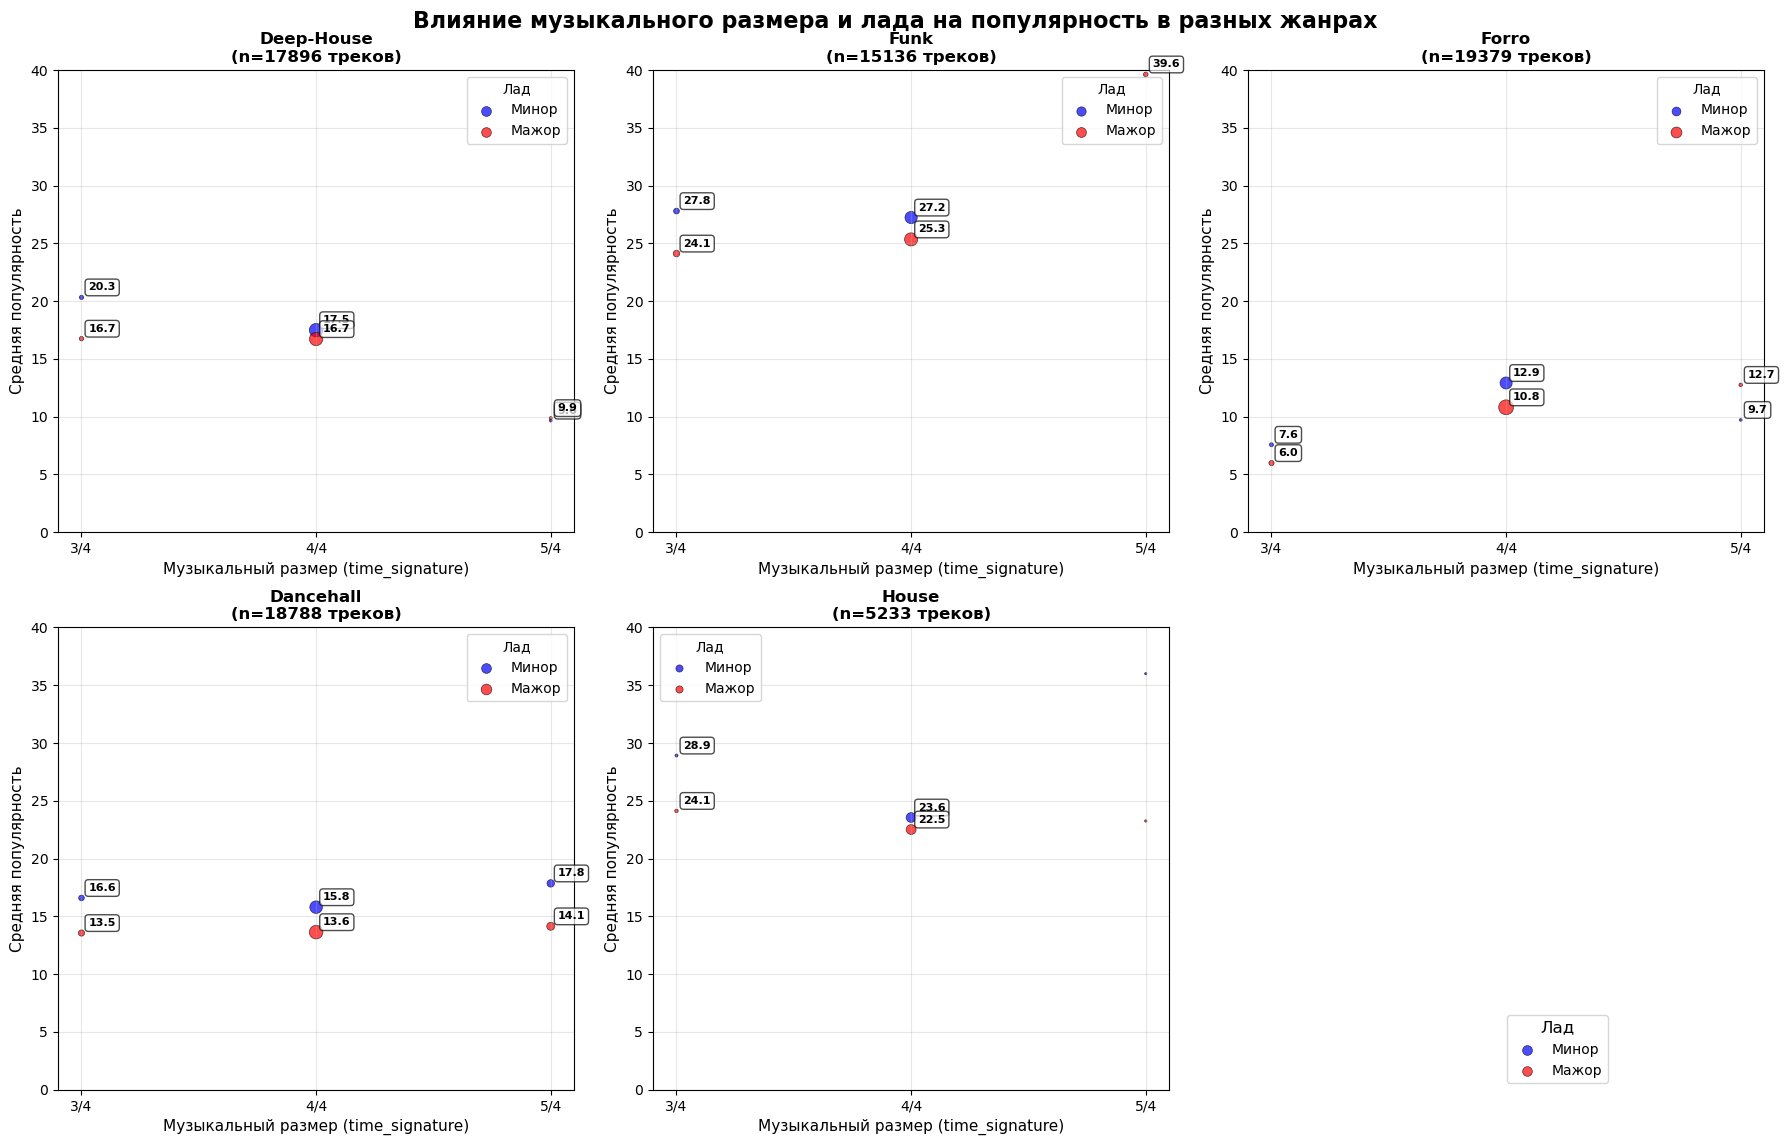

In [13]:
selected_genres = ['deep-house', 'funk', 'forro', 'dancehall', 'house']

genre_df = df[df['genre'].isin(selected_genres)].copy()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Влияние музыкального размера и лада на популярность в разных жанрах', 
             fontsize=16, fontweight='bold', y=0.95)

axes_flat = axes.flatten()

mode_colors = {0: 'blue', 1: 'red'}
mode_labels = {0: 'Минор', 1: 'Мажор'}

for i, genre in enumerate(selected_genres):
    ax = axes_flat[i]
    
    genre_data = genre_df[genre_df['genre'] == genre]
    
    popularity_by_params = genre_data.groupby(['time_signature', 'mode'])['popularity'].agg([
        'mean', 'std', 'count'
    ]).reset_index()
    
    popularity_by_params = popularity_by_params[popularity_by_params['count'] >= 5]
    
    if len(popularity_by_params) > 0:
        for mode in [0, 1]:
            mode_data = popularity_by_params[popularity_by_params['mode'] == mode]
            if len(mode_data) > 0:
                sizes = np.sqrt(mode_data['count'])
                
                scatter = ax.scatter(mode_data['time_signature'], 
                                   mode_data['mean'],
                                   s=sizes,
                                   c=mode_colors[mode],
                                   alpha=0.7,
                                   label=mode_labels[mode],
                                   edgecolors='black',
                                   linewidth=0.5)
                
                for _, row in mode_data.iterrows():
                    if row['count'] >= 10:
                        ax.annotate(f"{row['mean']:.1f}", 
                                  (row['time_signature'], row['mean']),
                                  xytext=(5, 5), textcoords='offset points',
                                  fontsize=8, fontweight='bold',
                                  bbox=dict(boxstyle="round,pad=0.3", facecolor="white", alpha=0.7))
        
        ax.set_xlabel('Музыкальный размер (time_signature)', fontsize=11)
        ax.set_ylabel('Средняя популярность', fontsize=11)
        ax.set_title(f'{genre.title()}\n(n={len(genre_data)} треков)', fontsize=12, fontweight='bold')
        
        unique_sizes = sorted(popularity_by_params['time_signature'].unique())
        ax.set_xticks(unique_sizes)
        ax.set_xticklabels([f'{size}/4' for size in unique_sizes])
        
        ax.grid(True, alpha=0.3)
        ax.legend(title='Лад')
        
        ax.set_ylim(0, 40)
    
    else:
        ax.text(0.5, 0.5, f'Недостаточно данных\nдля {genre}', 
                ha='center', va='center', transform=ax.transAxes, fontsize=12)
        ax.set_title(f'{genre.title()}', fontsize=12, fontweight='bold')

axes_flat[-1].axis('off')

handles, labels = axes_flat[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='lower right', bbox_to_anchor=(0.9, 0.05), 
           title='Лад', title_fontsize=12)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

### 6. Как выглядят графики плотности распределения, построенные для темпа по уникальным значениям размера трека? Как выглядят графики плотности нормальных распределений по этим данным?
**Результат**: Код, реализующий графики распределения темпа (tempo) для всех уникальных значений размера трека (time_signature).

Фигура должна иметь название и легенду. Плотности распределения должны быть построены либо на одном графике, либо на нескольких графиках, но в рамках одной фигуры. Плотности нормального распределения должны быть построены в одной на одном графике с плотностью распределения tempo.

**Дополнительно**: Код с ответом на вопрос, какие параметры (среднее и разброс) для нормальных распределений темпа для размера трека.

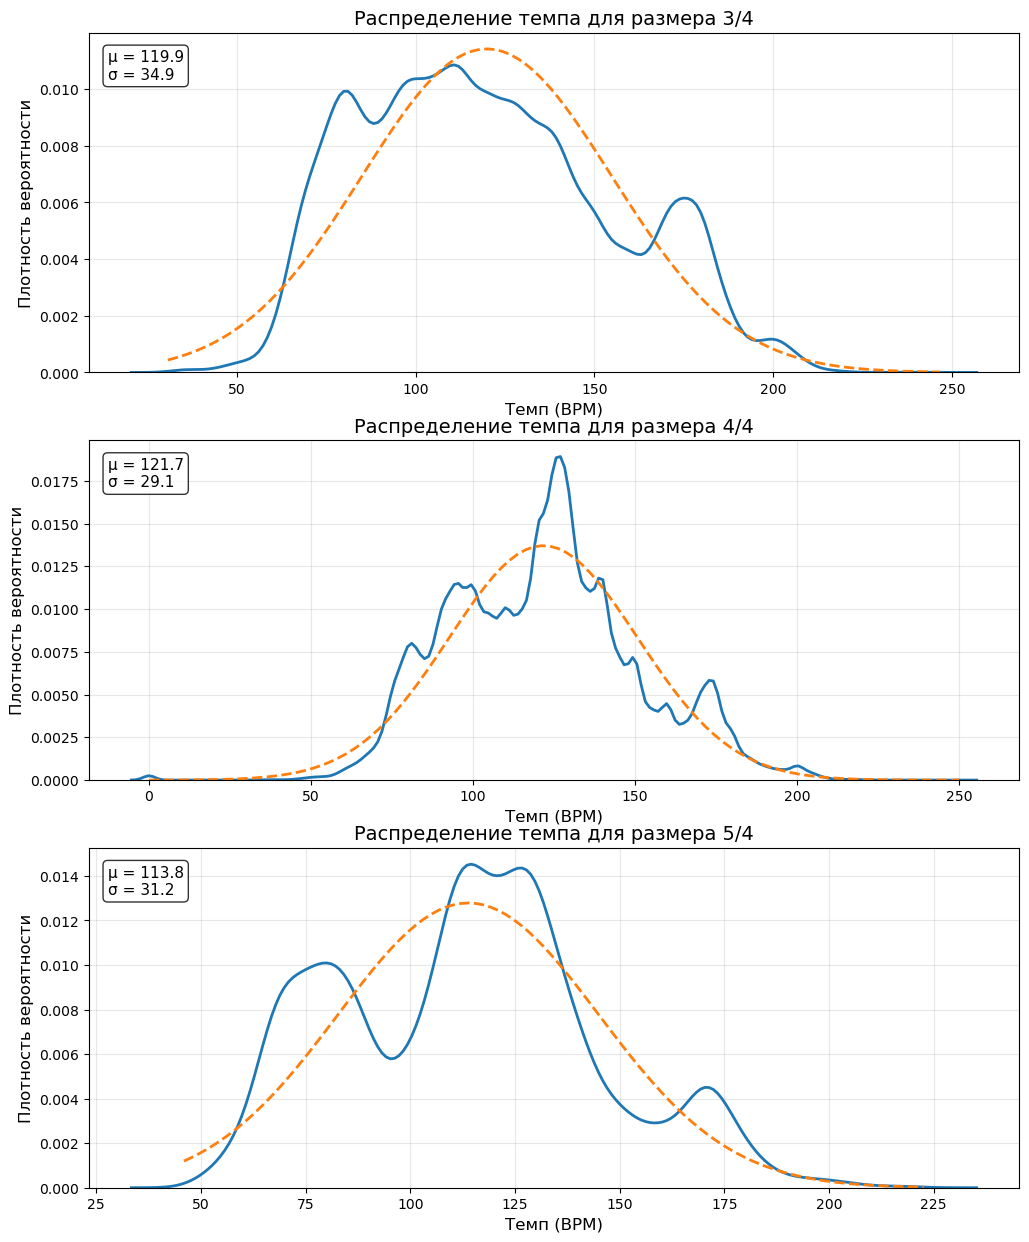

In [14]:
time_signatures = sorted(df['time_signature'].unique())
n_ts = len(time_signatures)
fig, axes = plt.subplots(n_ts, 1, figsize=(12, 4 * n_ts + 3))

if n_ts == 1:
    axes = [axes]

params = []
for i, ts in enumerate(time_signatures):
    ax = axes[i]
    ts_data = df[df['time_signature'] == ts]['tempo'].dropna()
    mu, std = ts_data.mean(), ts_data.std()
    params.append((ts, mu, std))
    sns.kdeplot(ts_data, ax=ax, label='Эмпирическое распределение', linewidth=2)
    x = np.linspace(ts_data.min(), ts_data.max(), 100)
    y = norm.pdf(x, mu, std)
    ax.plot(x, y, '--', label='Нормальное распределение', linewidth=2)
    ax.set_title(f'Распределение темпа для размера {ts}/4', fontsize=14)
    ax.set_xlabel('Темп (BPM)', fontsize=12)
    ax.set_ylabel('Плотность вероятности', fontsize=12)
    ax.grid(True, alpha=0.3)
    ax.text(0.02, 0.95, f'μ = {mu:.1f}\nσ = {std:.1f}', transform=ax.transAxes, verticalalignment='top', fontsize=11, bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
plt.show()

### 7. Проанализируйте популярность одного артиста (группы) с 10-100 треками на Ваш выбор. 

**Результат**: Код, реализующий следующие графики:

- График, отражающий динамику суммарной популярности артиста год от года. Укажите стрелками с подписями, благодаря каким треками артист был на пике и на дне популярности.
- Сопоставьте признаки для этих двух треков, в виде графиков на Ваш выбор. Укажите, какие из признаков вероятнее всего оказали наибольшее влияние на популярность выбранных треков.

Графики должны находится в одной фигуре, имеющей название. Каждый график должен иметь название, подписанные оси и, при необходимости, легенду.

Артист: Dream Theater
Количество треков: 151


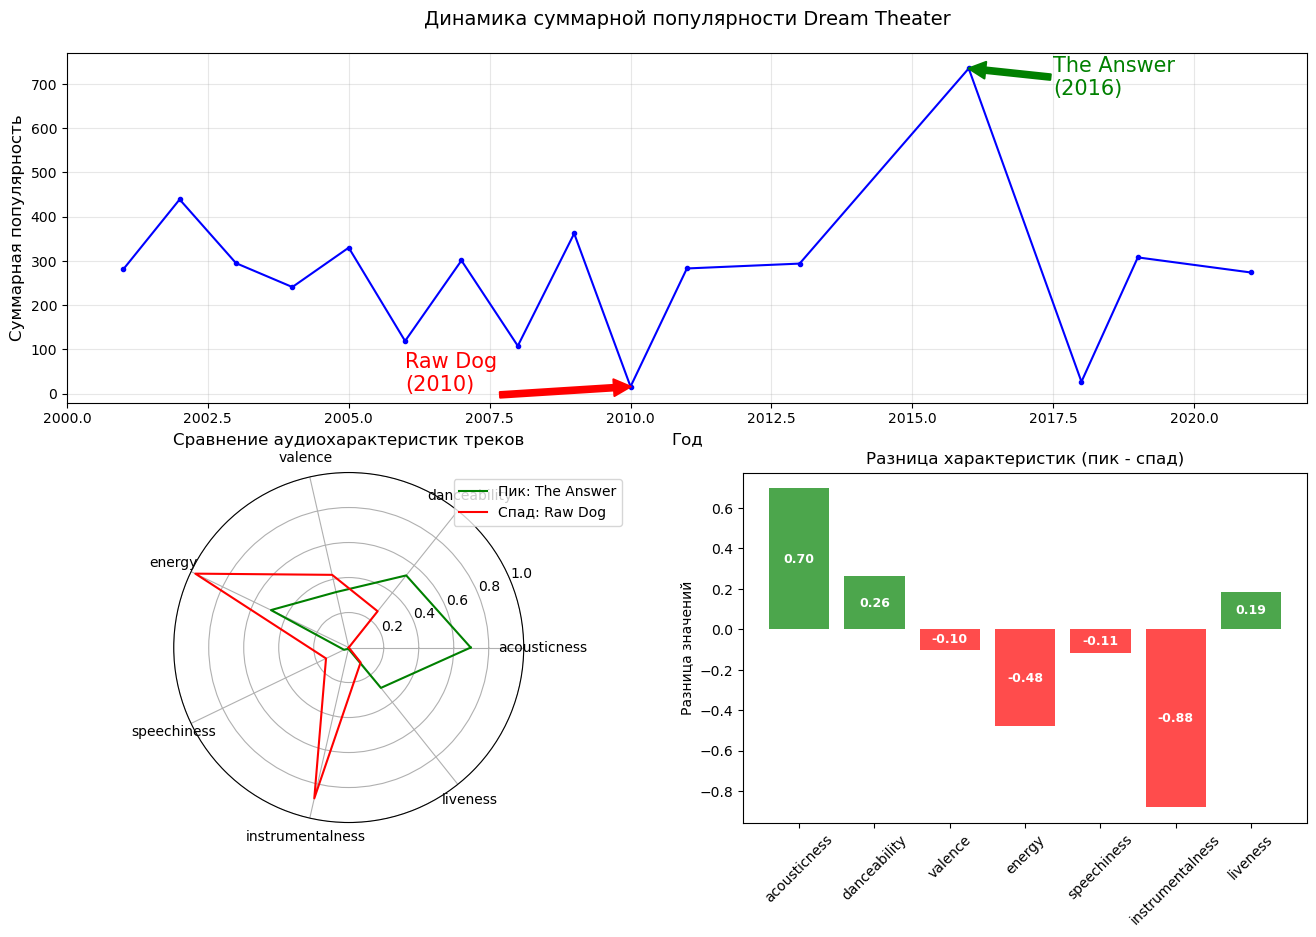

Пик популярности: The Answer(2016)
Спад популярности: Raw Dog(2010)
Характеристики, которые скорее всего повлияли на популярность:
	instrumentalness: -0.876
	acousticness: 0.697
	energy: -0.480


In [18]:
name = "Dream Theater"
dream_theater = df[df['artist_name'] == name].copy()
print(f"Артист: {name}")
print(f"Количество треков: {len(dream_theater)}")

fig = plt.figure(figsize=(16, 10))

yearly_popularity = dream_theater.groupby('year')['popularity'].sum().reset_index()
max_pop = yearly_popularity.loc[yearly_popularity['popularity'].idxmax()]
max_track = dream_theater[dream_theater['year'] == max_pop['year']].nlargest(1, 'popularity').iloc[0]

min_pop = yearly_popularity.loc[yearly_popularity['popularity'].idxmin()]
min_track = dream_theater[dream_theater['year'] == min_pop['year']].nlargest(1, 'popularity').iloc[0]

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax1.plot(yearly_popularity['year'], yearly_popularity['popularity'], marker='.', markersize=6, color='blue')
ax1.set_title(f'Динамика суммарной популярности {name}', fontsize=14, pad=20)
ax1.set_xlabel('Год', fontsize=12)
ax1.set_ylabel('Суммарная популярность', fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.annotate(f"{max_track['track_name']}\n({max_pop['year']})", xy=(max_pop['year'], max_pop['popularity']), xytext=(max_pop['year']+1.5, max_pop['popularity']-60), arrowprops=dict(color='green', lw=1.5), fontsize=15, color='green')
ax1.annotate(f"{min_track['track_name']}\n({min_pop['year']})", xy=(min_pop['year'], min_pop['popularity']), xytext=(min_pop['year']-4, min_pop['popularity']-10), arrowprops=dict(color='red', lw=1.5), fontsize=15, color='red')

features = ['acousticness', 'danceability','valence', 'energy', 'speechiness', 'instrumentalness', 'liveness']
max_val = [max_track[f] for f in features]
min_val = [min_track[f] for f in features]
angles = np.linspace(0, 2*np.pi, len(features), endpoint=False).tolist()
angles += angles[:1]
max_val += max_val[:1]
min_val += min_val[:1]

ax2 = plt.subplot2grid((2, 2), (1, 0), polar=True)
ax2.plot(angles, max_val,label=f"Пик: {max_track['track_name']}", color='green')
ax2.plot(angles, min_val, label=f"Спад: {min_track['track_name']}", color='red')
ax2.set_xticks(angles[:-1])
ax2.set_xticklabels(features, fontsize=10)
ax2.set_ylim(0, 1)
ax2.set_title('Сравнение аудиохарактеристик треков', fontsize=12, pad=20)
ax2.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

diff_values = [max_val[i] - min_val[i] for i in range(len(features))]
colors = ['green' if x > 0 else 'red' for x in diff_values]

ax3 = plt.subplot2grid((2, 2), (1, 1))
bars = ax3.bar(features, diff_values, color=colors, alpha=0.7)
ax3.set_title('Разница характеристик (пик - спад)', fontsize=12)
ax3.set_ylabel('Разница значений', fontsize=10)
ax3.tick_params(axis='x', rotation=45)

for bar, value in zip(bars, diff_values):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height/2,
             f'{value:.2f}', ha='center', va='center',
             fontsize=9, color='white', fontweight='bold')
plt.show()

print(f"Пик популярности: {max_track['track_name']}({max_pop['year']})")
print(f"Спад популярности: {min_track['track_name']}({min_pop['year']})")
print("Характеристики, которые скорее всего повлияли на популярность:")

feature_diff = [(features[i], abs(diff_values[i])) for i in range(len(features))]
feature_diff.sort(key=lambda x: x[1], reverse=True)

for feature, diff in feature_diff[:3]:
    if max_track[feature] > min_track[feature]:
        print(f"\t{feature}: {diff:.3f}")
    else:
        print(f"\t{feature}: -{diff:.3f}")